In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv('data/sac_find_best_relax.csv')
df.drop('name', axis=1, inplace=True)

flop = df['size'] * df['size'] * (2 * df['size'] - 1)
df['MFLOP/J'] = (flop / 1e6) / df['energy']
df['GFLOP/s'] = (flop / 1e9) / df['runtime']
df['MFLOP/J SD'] = 0 * df['energysd'] # How to compute this?

df

,pin,size,threads,runtime,runtimesd,energy,energysd,MFLOP/J,GFLOP/s,MFLOP/J SD
0,True,1000,1,0.015179,0.000256,0.239315,0.007670,8352.998467,131.691027,0.0
1,True,1000,2,0.015457,0.000146,0.246155,0.008549,8120.908011,129.323590,0.0
2,True,1000,3,0.010326,0.000095,0.201866,0.009071,9902.608661,193.597248,0.0
3,True,1000,4,0.007733,0.000072,0.158623,0.010060,12602.185505,258.495502,0.0
4,True,1000,5,0.006187,0.000059,0.146236,0.009323,13669.665924,323.108827,0.0
...,...,...,...,...,...,...,...,...,...,...
59,False,10000,12,0.258604,0.002541,9.810393,0.112183,203855.231154,7733.442442,0.0
60,False,10000,13,0.238788,0.002362,9.940516,0.194516,201186.748914,8375.227969,0.0
61,False,10000,14,0.222228,0.002747,9.349306,0.121340,213908.922916,8999.309133,0.0
62,False,10000,15,0.207145,0.002312,9.467171,0.108508,211245.794456,9654.579992,0.0


In [88]:
def twin_plot(df, ax, bar_y, line_y, sd, bar_label=None, line_label=None, bar_min=True):
    if bar_label == None: bar_label = bar_y
    if line_label == None: line_label = line_y
    
    x = list(range(0, len(df)))
    
    sns.barplot(x=x, y=df[bar_y], label=bar_label, legend=False, ax=ax)
    axt = ax.twinx()
    sns.lineplot(x=x, y=df[line_y], label=line_label, legend=False, color='r', ax=axt)
    axt.set_ylim((0,None))

    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = axt.get_legend_handles_labels()
    ax.legend(lines + lines2, labels + labels2)

    ax.errorbar(x=x, y=df[bar_y], yerr=df[sd], fmt='none', c='black')

    for bar in ax.patches:
        if ((bar_min and bar.get_height() == df[bar_y].min()) or
            (not bar_min and bar.get_height() == df[bar_y].max())):
            bar.set_color('g')
            break

    ax.set_ylabel(bar_label)
    axt.set_ylabel(line_label)

    return axt

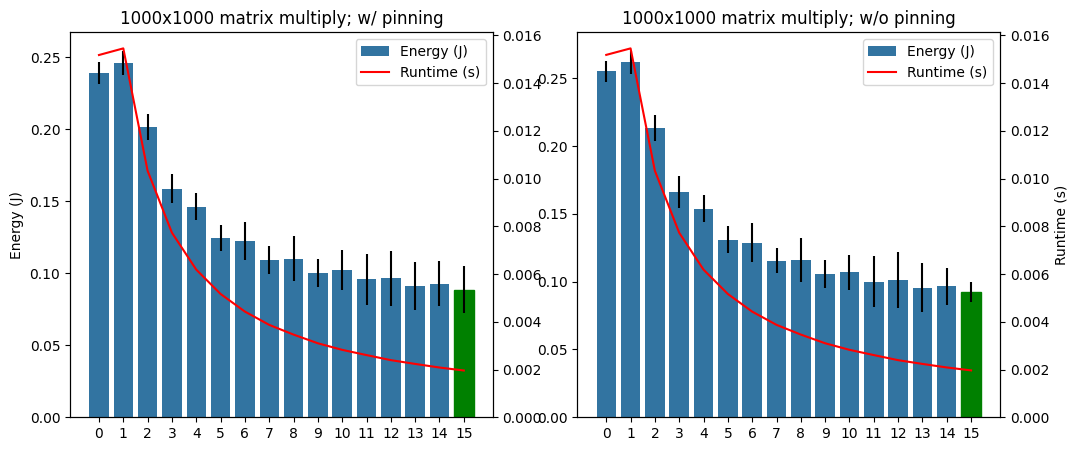

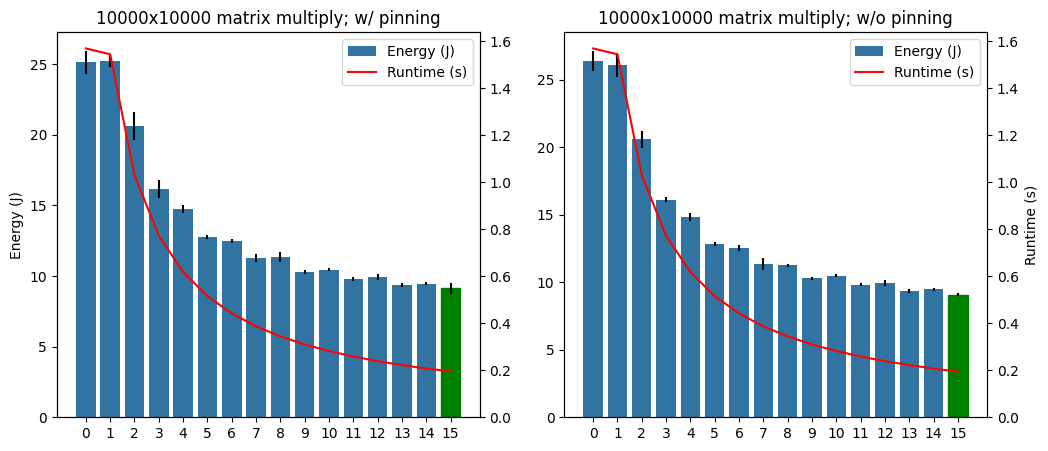

In [89]:
for size, dfx in df.groupby('size'):
    w_pin = dfx[dfx['pin'] == True]
    wo_pin = dfx[dfx['pin'] == False]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

    axt = twin_plot(w_pin, ax1, 'energy', 'runtime', 'energysd', 'Energy (J)', 'Runtime (s)')
    twin_plot(wo_pin, ax2, 'energy', 'runtime', 'energysd', 'Energy (J)', 'Runtime (s)')
    axt.set_ylabel('')
    ax2.set_ylabel('')

    ax1.set_title(f'{size}x{size} matrix multiply; w/ pinning')
    ax2.set_title(f'{size}x{size} matrix multiply; w/o pinning')

plt.show()

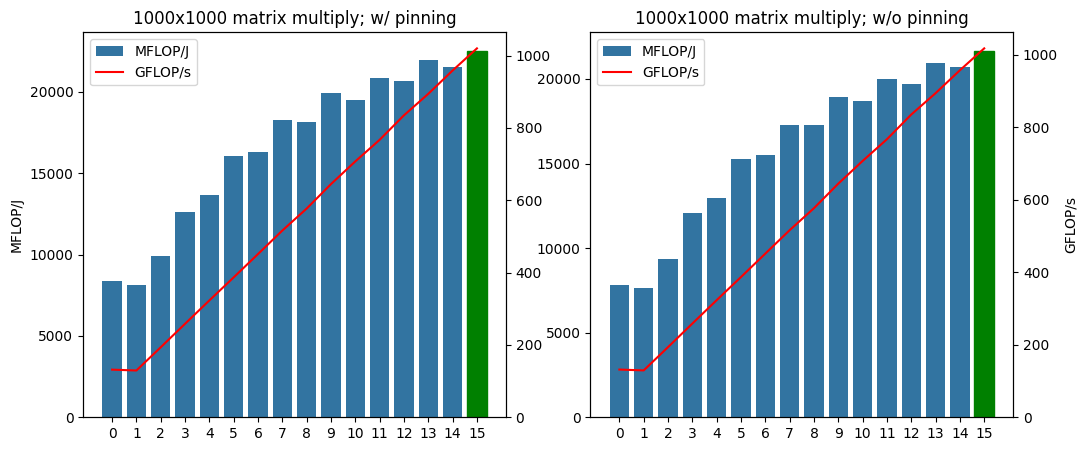

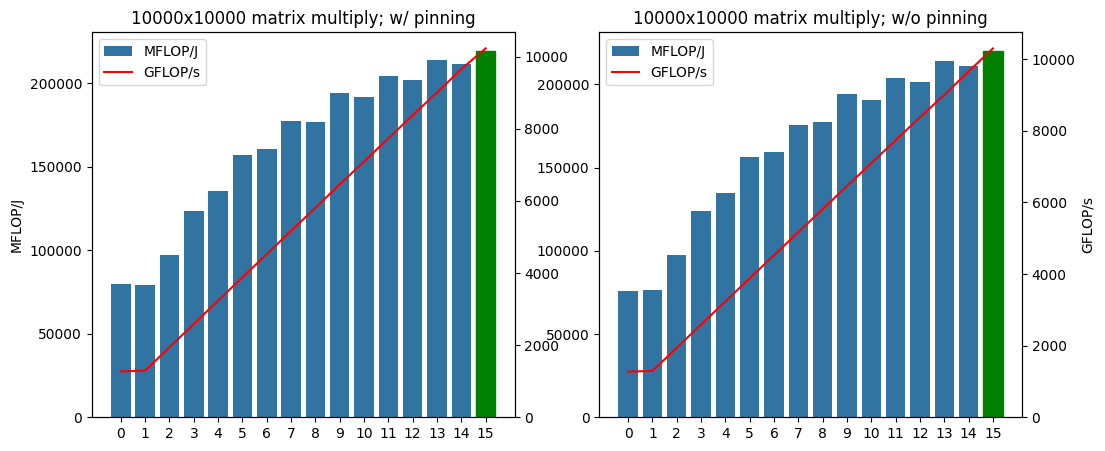

In [90]:
for size, dfx in df.groupby('size'):
    w_pin = dfx[dfx['pin'] == True]
    wo_pin = dfx[dfx['pin'] == False]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

    axt = twin_plot(w_pin, ax1, 'MFLOP/J', 'GFLOP/s', 'MFLOP/J SD', bar_min=False)
    twin_plot(wo_pin, ax2, 'MFLOP/J', 'GFLOP/s', 'MFLOP/J SD', bar_min=False)
    axt.set_ylabel('')
    ax2.set_ylabel('')

    ax1.set_title(f'{size}x{size} matrix multiply; w/ pinning')
    ax2.set_title(f'{size}x{size} matrix multiply; w/o pinning')

plt.show()